In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from bs4 import BeautifulSoup
import re

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Reviews_withURL.csv")

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Text Preprocessing

In [ ]:
df['Time_Date'] = pd.to_datetime(df['Time'],unit='s')
df['Time_Month'] = df['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))



In [ ]:
#df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})
#df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

df['Helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df = df[(df['Helpfulness_ratio'] >= 0.0) & (df['Helpfulness_ratio'] <= 1.0)]

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.shape

(298400, 11)

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])



preprocessed_reviews = []

for sentance in tqdm(df['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)

    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)

    sentance = re.sub("\S*\d\S*", "", sentance).strip()

    sentance = re.sub('[^A-Za-z]+', ' ', sentance)

    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())



100%|██████████| 298400/298400 [02:05<00:00, 2371.49it/s]


In [ ]:
df['clean_text'] = preprocessed_reviews


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_ratio,Time_Date,Time_Month,clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011-04-27,2011-04,bought several vitality canned dog food produc...
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008-08-18,2008-08,confection around centuries light pillowy citr...
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011-06-13,2011-06,looking secret ingredient robitussin believe f...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,2011-11-23,2011-11,right mostly sprouting cats eat grass love rot...
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,2005-02-08,2005-02,not know cactus tequila unique combination ing...


In [ ]:
df["clean_text_length"] = df['clean_text'].apply(lambda col: len(col.split(' ')))
df["text_length"] = df['Text'].apply(lambda col: len(col.split(' ')))

In [ ]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName                4
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
Helpfulness_ratio          0
Time_Date                  0
Time_Month                 0
clean_text                 0
clean_text_length          0
text_length                0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df['clean_text'][1]

'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch'

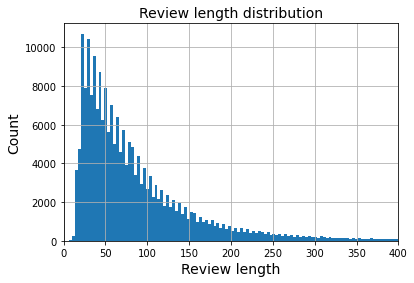

In [ ]:
df["text_length"].hist(bins=1000);
plt.xlim(0,400)
plt.xlabel("Review length",fontsize=14)
plt.ylabel("Count",fontsize=14)

plt.title('Review length distribution',fontsize=14);

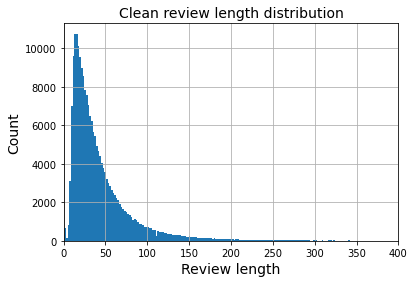

In [ ]:
df["clean_text_length"].hist(bins=1000);
plt.xlim(0,400)
plt.xlabel("Review length",fontsize=14)
plt.ylabel("Count",fontsize=14)

plt.title('Clean review length distribution',fontsize=14);

In [ ]:
df["Helpfulness_ratio"].value_counts()

1.000000    183306
0.000000     33774
0.500000     21623
0.666667     10513
0.750000      6364
             ...  
0.530303         1
0.089552         1
0.028302         1
0.991870         1
0.490909         1
Name: Helpfulness_ratio, Length: 949, dtype: int64

In [ ]:
user_number_review = df.groupby(by = ['UserId']).count().sort_values(by = ['Text'],ascending=False)

user_number_review.head()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_ratio,clean_text,clean_text_length,text_length
UserId,,,,,,,,,,,,,
A1YUL9PCJR3JTY,367,367,367,367,367,367,367,367,367,367,367,367,367
A281NPSIMI1C2R,241,241,241,241,241,241,241,241,241,241,241,241,241
A3OXHLG6DIBRW8,221,221,221,221,221,221,221,221,221,221,221,221,221
A3TVZM3ZIXG8YW,199,199,199,199,199,199,199,199,199,199,199,199,199
AY12DBB0U420B,160,160,160,160,160,160,160,160,160,160,160,160,160


In [ ]:
user_top_reviewer = user_number_review[user_number_review['Id'] > 10][['Id']]
user_top_reviewer = user_top_reviewer.rename(columns = {"Id": "count_reviews"}, inplace = False)
user_top_reviewer.head(10)

,count_reviews
UserId,
A1YUL9PCJR3JTY,367
A281NPSIMI1C2R,241
A3OXHLG6DIBRW8,221
A3TVZM3ZIXG8YW,199
AY12DBB0U420B,160
AQQLWCMRNDFGI,155
A1Z54EM24Y40LL,153
A3HPCRD9RX351S,146
A29JUMRL1US6YP,145


In [ ]:
user_average_info = df.groupby(by=['UserId']).mean()
user_average_info

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Helpfulness_ratio,clean_text_length,text_length
UserId,,,,,,,,
#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,0.500000,21.0,56.0
#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,0.000000,11.0,21.0
#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,0.000000,50.0,85.0
#oc-R115TNMSPFT9I7,132095.0,2.0,3.0,2.0,1.331510e+09,0.666667,75.0,137.0
#oc-R119LM8D59ZW8Y,21719.0,5.0,11.0,1.0,1.320192e+09,0.454545,176.0,351.0
...,...,...,...,...,...,...,...,...
AZZU4D6TZ2L6J,387817.0,2.0,2.0,5.0,1.247875e+09,1.000000,12.0,22.0
AZZU5BA2CHYVF,367716.0,1.0,1.0,5.0,1.343434e+09,1.000000,55.0,123.0
AZZUQYE2C1LNI,486457.0,2.0,2.0,4.0,1.278374e+09,1.000000,41.0,66.0


In [ ]:
user_number_review = user_number_review[["Id"]]

In [ ]:
user_number_review = user_number_review.rename(columns = {"Id": "count_reviews"}, inplace = False)


In [ ]:
user_number_review.head()

,count_reviews
UserId,
A1YUL9PCJR3JTY,367
A281NPSIMI1C2R,241
A3OXHLG6DIBRW8,221
A3TVZM3ZIXG8YW,199
AY12DBB0U420B,160


In [ ]:
reviewer_avg_data = pd.merge(user_average_info, user_number_review, how = 'inner',on = 'UserId')

In [ ]:
reviewer_avg_data.shape

(149986, 10)

In [ ]:
reviewer_avg_data.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Helpfulness_ratio,clean_text_length,text_length,Helpfulness %,count_reviews
UserId,,,,,,,,,,
#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,0.500000,21.0,56.0,50.000000,1
#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,0.000000,11.0,21.0,0.000000,1
#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,0.000000,50.0,85.0,0.000000,1
#oc-R115TNMSPFT9I7,132095.0,2.0,3.0,2.0,1.331510e+09,0.666667,75.0,137.0,66.666667,2
#oc-R119LM8D59ZW8Y,21719.0,5.0,11.0,1.0,1.320192e+09,0.454545,176.0,351.0,45.454545,1


In [ ]:
top_reviewer_avg_data = pd.merge(user_average_info,user_top_reviewer,how = 'inner',on = 'UserId')

In [ ]:
user_average_info.shape

(149828, 8)

In [ ]:
reviewer_avg_data.shape

(149828, 9)

In [ ]:
top_reviewer_avg_data.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Helpfulness_ratio,clean_text_length,text_length,Helpfulness %,count_reviews
UserId,,,,,,,,,,
A100WO06OQR8BQ,281565.781250,1.437500,4.156250,2.218750,1.319568e+09,0.293697,93.687500,185.250000,29.369658,32
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,0.346154,146.500000,287.923077,34.615385,26
A106ZCP7RSXMRU,298373.683333,3.183333,3.616667,4.716667,1.208736e+09,0.845754,48.766667,95.150000,84.575397,60
A1080SE9X3ECK0,275881.763158,2.447368,2.684211,4.631579,1.231436e+09,0.905336,21.894737,39.894737,90.533626,38
A10AFVU66A79Y1,308244.310345,2.310345,2.896552,2.931034,1.279611e+09,0.785386,72.000000,161.620690,78.538588,29


In [ ]:
top_reviewer_avg_data = top_reviewer_avg_data.reset_index(drop = True)

In [ ]:
top_reviewer_avg_data.value_counts("count_reviews")

count_reviews
1     108054
2      17734
3       7466
4       5498
5       2702
6       1964
7       1277
8       1001
9        816
10       614
dtype: int64

In [ ]:
max(top_reviewer_avg_data["count_reviews"])

180

Review helpfulness distribution for top reviewers¶


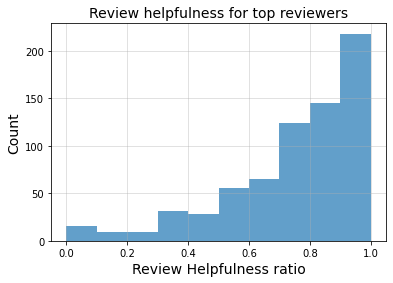

In [ ]:
#計算ratio_helpful在不同的高級評論者(評論次數大於10)的次數
# review helpfulness distribution
top_reviewer_avg_data['Helpfulness_ratio'].hist(bins=10,label='review helpfullness top reviewers',alpha=0.7);

plt.xlabel('Review Helpfulness ratio',fontsize=14);
plt.ylabel('Count',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfulness for top reviewers',fontsize=14);

Review helpfulness distribution for reviewers¶


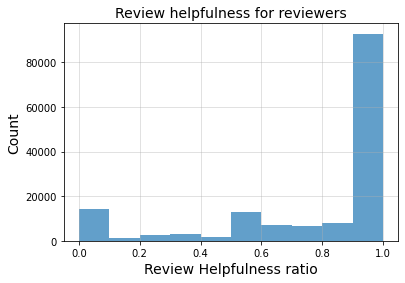

In [ ]:
# review helpfulness distribution
reviewer_avg_data["Helpfulness_ratio"].hist(bins=10,label='review helpfullness reviewers',alpha=0.7);

plt.xlabel('Review Helpfulness ratio',fontsize=14);
plt.ylabel('Count',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfulness for reviewers',fontsize=14);

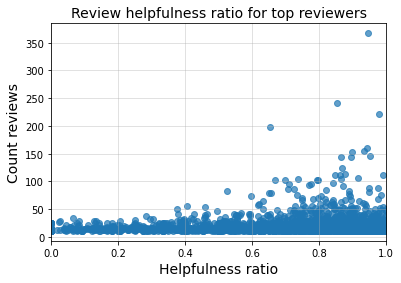

In [ ]:
plt.scatter(top_reviewer_avg_data['Helpfulness_ratio'], top_reviewer_avg_data['count_reviews'],alpha=0.7);
plt.xlim(0,1);
plt.xlabel('Helpfulness ratio',fontsize=14);
plt.ylabel('Count reviews',fontsize=14);
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfulness ratio for top reviewers',fontsize=14);

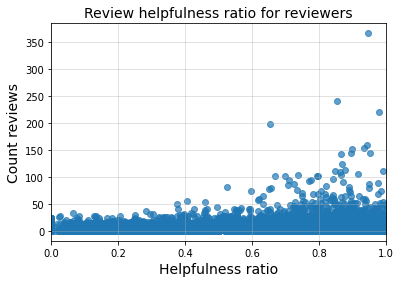

In [ ]:
plt.scatter(reviewer_avg_data['Helpfulness_ratio'], reviewer_avg_data['count_reviews'],alpha=0.7);
plt.xlim(0,1);
plt.xlabel('Helpfulness ratio',fontsize=14);
plt.ylabel('Count reviews',fontsize=14);
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review helpfulness ratio for reviewers',fontsize=14);

Review helpfulness vs. review length for top reviewers¶


In [ ]:
top_reviewer_avg_data.head()


,Id_x,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Helpfulness_ratio,clean_text_length,text_length,Id_y
UserId,,,,,,,,,
A100WO06OQR8BQ,281565.781250,1.437500,4.156250,2.218750,1.319568e+09,0.293697,93.687500,185.250000,32
A101P2KHWCU0G6,306505.230769,0.346154,1.653846,2.038462,1.338788e+09,0.346154,146.500000,287.923077,26
A106ZCP7RSXMRU,298373.683333,3.183333,3.616667,4.716667,1.208736e+09,0.845754,48.766667,95.150000,60
A1080SE9X3ECK0,275881.763158,2.447368,2.684211,4.631579,1.231436e+09,0.905336,21.894737,39.894737,38
A10AFVU66A79Y1,308244.310345,2.310345,2.896552,2.931034,1.279611e+09,0.785386,72.000000,161.620690,29


To see the correlation with the average of "text length" and Helpfullness ratio for each top reviewers.




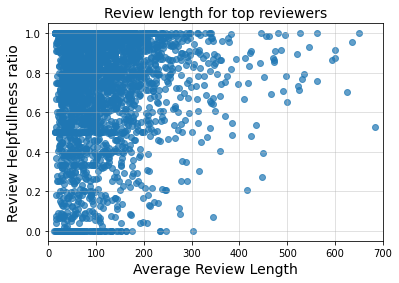

In [ ]:
#高級評論者的平均評論長度和helpfulness ratio的散佈圖
plt.scatter(top_reviewer_avg_data['text_length'], top_reviewer_avg_data['Helpfulness_ratio'],alpha=0.7);
plt.xlim(0,700);
plt.xlabel('Average Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);
plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Review length for top reviewers',fontsize=14);

To see the correlation with the average of "clean text length" and ratio_helpful for each top reviewers.


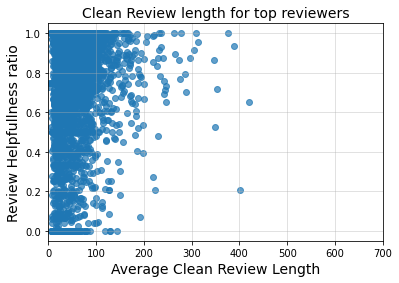

In [ ]:
plt.scatter(top_reviewer_avg_data['clean_text_length'], top_reviewer_avg_data['Helpfulness_ratio'],alpha=0.7);
plt.xlim(0,700);
plt.xlabel('Average Clean Review Length',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Clean Review length for top reviewers',fontsize=14);

Review helpfulness vs. review count for top reviewers¶




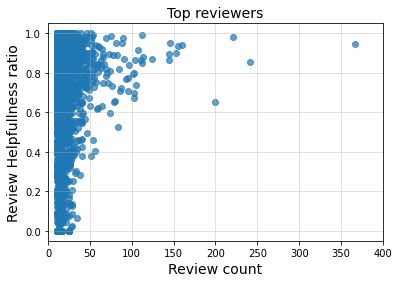

In [ ]:
#高級評論者的評論次數和helpfulness ratio的散佈圖
#review helpfulness vs. review count
plt.scatter(top_reviewer_avg_data['count_reviews'],top_reviewer_avg_data["Helpfulness_ratio"],alpha=0.7);
plt.xlim(0,400);
plt.xlabel('Review count',fontsize=14);
plt.ylabel('Review Helpfullness ratio',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Top reviewers',fontsize=14);

Review frequency vs. review length for top reviewers¶




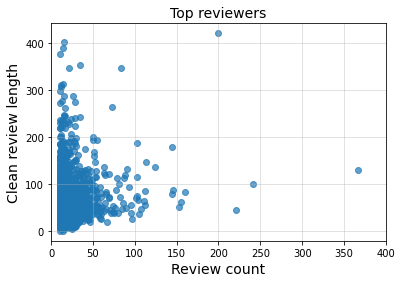

In [ ]:
#高級評論者的評論次數和平均評論長度的散佈圖
#review count of top reviewers vs. review length
plt.scatter(top_reviewer_avg_data['count_reviews'],top_reviewer_avg_data['clean_text_length'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,400);

plt.xlabel('Review count',fontsize=14);
plt.ylabel('Clean review length',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Top reviewers',fontsize=14);


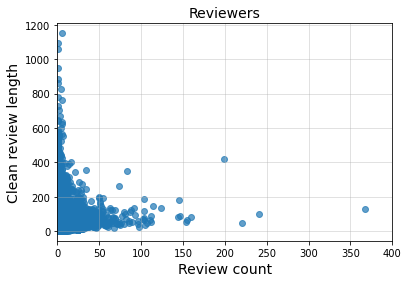

In [ ]:
#高級評論者的評論次數和平均評論長度的散佈圖
#review count of top reviewers vs. review length
plt.scatter(reviewer_avg_data['count_reviews'],reviewer_avg_data['clean_text_length'],alpha=0.7); #,c=top_reviewer_avg_data['ratio_helpful'])
plt.xlim(0,400);

plt.xlabel('Review count',fontsize=14);
plt.ylabel('Clean review length',fontsize=14);

plt.grid(linewidth=0.5,alpha=0.75)


plt.title('Reviewers',fontsize=14);
